<a href="https://colab.research.google.com/github/subhedarsoham18/Stock-Price-Trend-Prediction-with-LSTM/blob/main/_Stock_Price_Trend_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data = data[['Close']]


/tmp/ipython-input-1-2776883867.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [48]:
!pip install keras

In [49]:
import keras as ks
from keras import Input
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])



In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0217 - val_loss: 0.0027
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


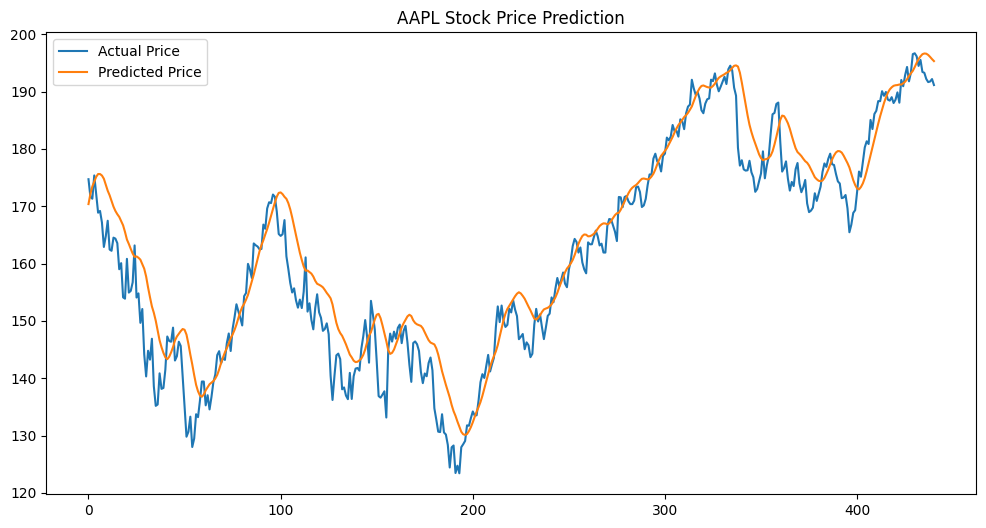

In [8]:
import matplotlib.pyplot as plt
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.title(f'{ticker} Stock Price Prediction')
plt.show()


In [6]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data = data[['Close']]

# Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()

# RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

/tmp/ipython-input-6-2499803994.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed
